In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline


#https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt   

Using TensorFlow backend.


In [2]:
#모델 로드
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')

#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')

#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')  

In [ ]:
#vgg_model.summary()    # 138,357,544, #이 네트워크 쓸라면 이미지가 무조건 224,244 이어야 한다.
#resnet_model.summary()  # 25,636,712
#mobilenet_model.summary() # 4,253,864

In [46]:
# augmentation 없이  학습
batch_size = 27

test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지를 배치 단위로 불러와 줄 generator입니다.
test_generator = test_datagen.flow_from_directory(
        'tmp/test',
        target_size=(224, 224),
        #batch_size=batch_size,
        class_mode='binary',
        shuffle=False
        )

img_l, _ = test_generator.next() #이미지 반환

Found 42 images belonging to 7 classes.


In [42]:
#expend dimension 4차원으로 확장하기 위한 함수, 4차원이면 쓸 필요없다.
#image_batch = np.expand_dims(img_l, axis=0)

# 전처리 및 예측

In [47]:
# processed_image = vgg16.preprocess_input(image_batch.copy())
# predictions = vgg_model.predict(processed_image[0])
predictions = vgg_model.predict(img_l*255)
label_vgg = decode_predictions(predictions, top=1)
print(label_vgg)
print()

# processed_image = resnet50.preprocess_input(image_batch.copy())
# predictions = resnet_model.predict(processed_image[0])
predictions = resnet_model.predict(img_l*255)
label_resnet = decode_predictions(predictions, top=1)
print(label_resnet)
print()

#processed_image = mobilenet.preprocess_input(img_l.copy())
#predictions = mobilenet_model.predict(processed_image)
predictions = mobilenet_model.predict(img_l)
label_mobilenet = decode_predictions(predictions, top=1)
print(label_mobilenet)
print()

[[('n04285008', 'sports_car', 0.29949096)], [('n04037443', 'racer', 0.5673124)], [('n04285008', 'sports_car', 0.5970909)], [('n04285008', 'sports_car', 0.5330031)], [('n02124075', 'Egyptian_cat', 0.48462406)], [('n02124075', 'Egyptian_cat', 0.46259117)], [('n02134084', 'ice_bear', 0.5018016)], [('n02123045', 'tabby', 0.62062484)], [('n02124075', 'Egyptian_cat', 0.86511886)], [('n02124075', 'Egyptian_cat', 0.76033664)], [('n02108915', 'French_bulldog', 0.41757315)], [('n02114548', 'white_wolf', 0.8505828)], [('n02104029', 'kuvasz', 0.496445)], [('n02109047', 'Great_Dane', 0.9759245)], [('n02109961', 'Eskimo_dog', 0.4085195)], [('n02088094', 'Afghan_hound', 0.19046049)], [('n02112018', 'Pomeranian', 0.95275027)], [('n02113624', 'toy_poodle', 0.29224798)], [('n03961711', 'plate_rack', 0.26773348)], [('n03476684', 'hair_slide', 0.29095516)], [('n15075141', 'toilet_tissue', 0.47069502)], [('n02877765', 'bottlecap', 0.1848536)], [('n04476259', 'tray', 0.12118094)], [('n04447861', 'toilet_sea

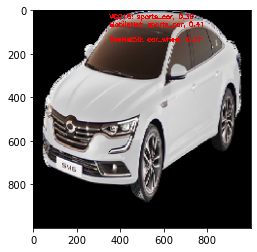

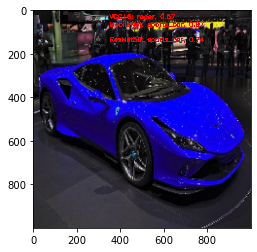

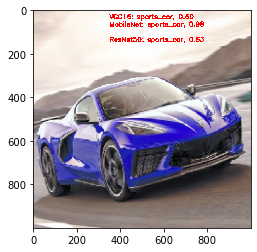

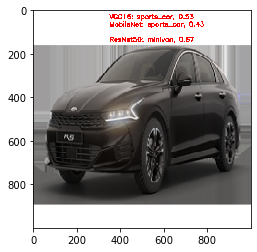

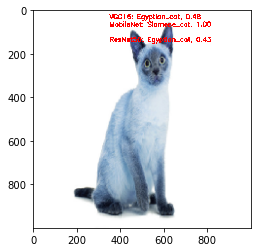

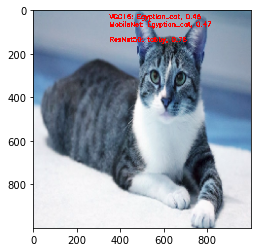

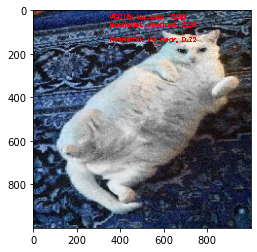

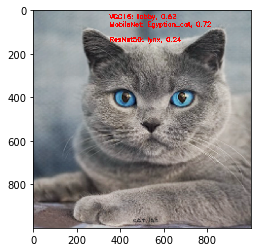

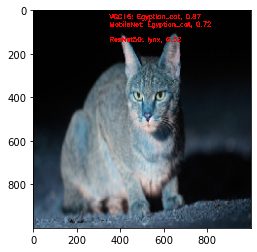

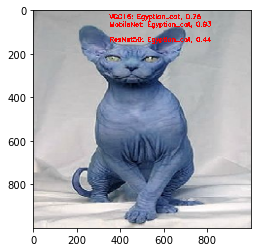

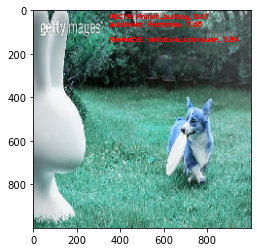

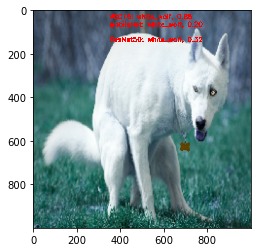

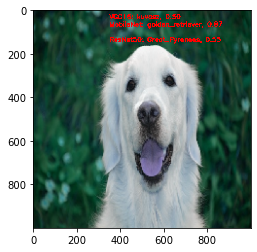

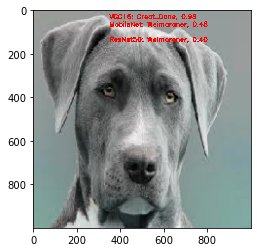

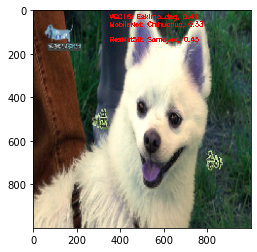

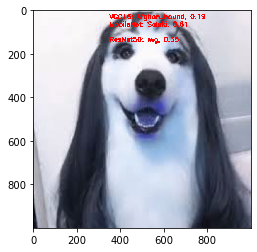

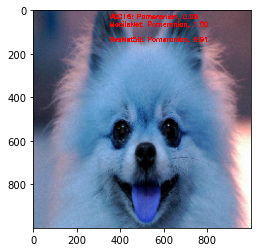

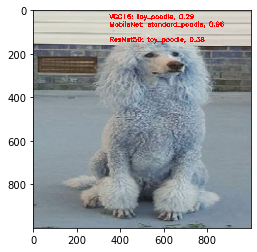

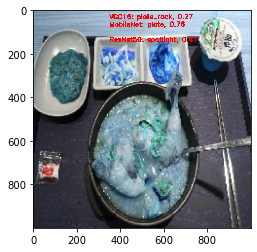

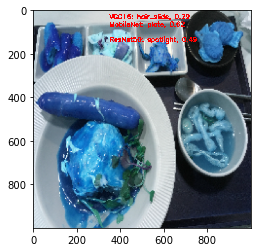

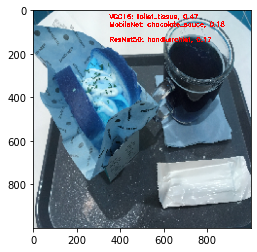

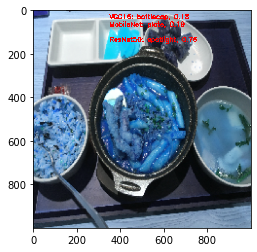

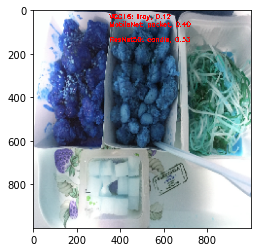

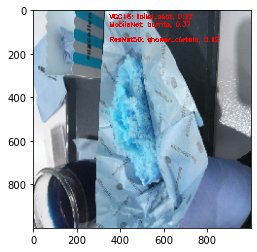

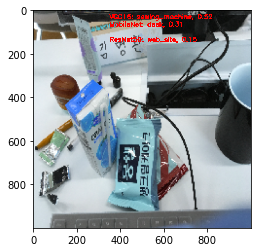

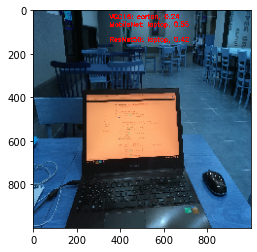

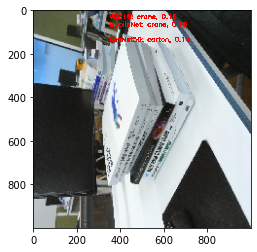

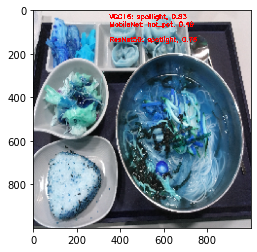

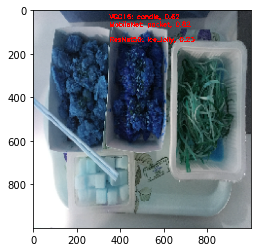

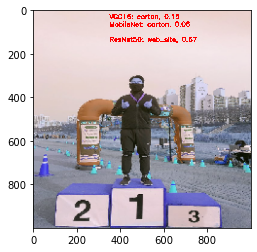

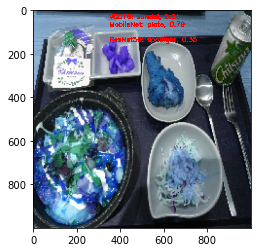

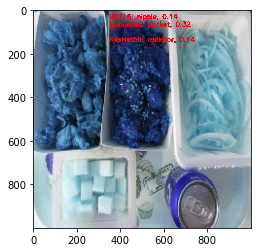

In [48]:
import cv2
for i in range(len(img_l)):
    img = cv2.resize(img_l[i]*255, (1000,1000))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[i][0][1], label_vgg[i][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3) #이름, 확률
    cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[i][0][1], label_mobilenet[i][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[i][0][1], label_resnet[i][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.imwrite("tmp/result/1.5_LAB_out_{}.jpg".format(i), img)
    plt.imshow(img/255)
    plt.show()